In [1]:
import pyam

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pyam
import matplotlib.pyplot as plt

In [3]:
df = pyam.IamDataFrame(data='tutorial_data.csv')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file tutorial_data.csv


In [4]:
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, C-ROADS-5.005, GCAM 4.2, ... WITCH-GLOBIOM 4.4 (14)
 * scenario : ADVANCE_2020_1.5C-2100, CD-LINKS_NPi2020_1000, ... TERL_15D_NoTransportPolicy (33)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CH4 (1)
   unit     : Mt CH4/yr (1)
   year     : 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, ... 2100 (19)
Meta indicators:
   exclude (bool) False (1)

In [5]:
df.model

['AIM/CGE 2.0',
 'AIM/CGE 2.1',
 'C-ROADS-5.005',
 'GCAM 4.2',
 'IMAGE 3.0.1',
 'MESSAGE-GLOBIOM 1.0',
 'MESSAGEix-GLOBIOM 1.0',
 'POLES ADVANCE',
 'REMIND 1.5',
 'REMIND 1.7',
 'REMIND-MAgPIE 1.7-3.0',
 'WITCH-GLOBIOM 3.1',
 'WITCH-GLOBIOM 4.2',
 'WITCH-GLOBIOM 4.4']

In [6]:
df.scenario

['ADVANCE_2020_1.5C-2100',
 'CD-LINKS_NPi2020_1000',
 'CD-LINKS_NPi2020_400',
 'CEMICS-1.5-CDR12',
 'CEMICS-1.5-CDR8',
 'EMC_Def_100$',
 'EMC_LimSW_100$',
 'EMC_NucPO_100$',
 'EMC_lowEI_100$',
 'EMF33_1.5C_cost100',
 'EMF33_1.5C_full',
 'IMA15-AGInt',
 'IMA15-Def',
 'IMA15-Eff',
 'IMA15-LiStCh',
 'IMA15-Pop',
 'IMA15-TOT',
 'LowEnergyDemand',
 'PEP_1p5C_red_eff',
 'Ratchet-1.5-limCDR-noOS',
 'Ratchet-1.5-noCDR',
 'Ratchet-1.5-noCDR-noOS',
 'SMP_1p5C_Def',
 'SMP_1p5C_Sust',
 'SMP_1p5C_early',
 'SMP_1p5C_lifesty',
 'SMP_1p5C_regul',
 'SMP_2C_Sust',
 'SSP1-19',
 'SSP2-19',
 'SSP4-19',
 'TERL_15D_LowCarbonTransportPolicy',
 'TERL_15D_NoTransportPolicy']

In [7]:
df.region

['World']

In [8]:
df.unit_mapping

{'Emissions|CH4': 'Mt CH4/yr'}

In [9]:
df.filter(model='MESSAGE').scenario

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

In [10]:
df.filter(model='MESSAGE*').scenario

['ADVANCE_2020_1.5C-2100',
 'EMF33_1.5C_cost100',
 'EMF33_1.5C_full',
 'SSP1-19',
 'SSP2-19',
 'LowEnergyDemand']

In [11]:
df.filter(region='World').region

['World']

In [12]:
df.filter(region='World', keep=False).region

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

In [13]:
df.filter(variable='Primary Energy*', level=1).variable

pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

In [14]:
df.filter(variable='Emissions*', level=1).variable

['Emissions|CH4']

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Emissions|CH4'}, xlabel='Year', ylabel='Mt CH4/yr'>

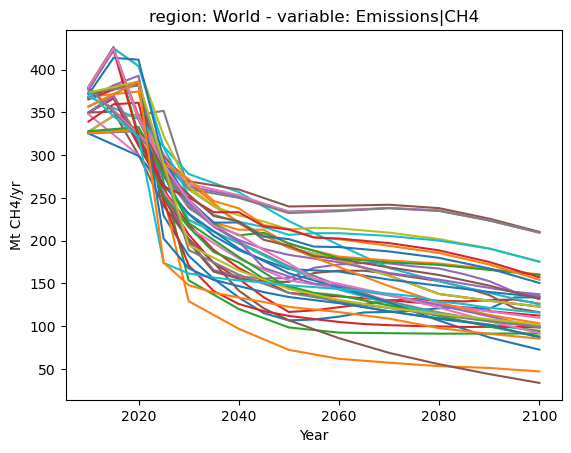

In [26]:
df.filter(variable='Emissions|CH4' ).plot()

In [16]:
display_df = df.filter(model='MESSAGE*', variable='Emissions', region='World')
display_df.timeseries()

pyam.core - WARNING: Filtered IamDataFrame is empty!


ValueError: This IamDataFrame is empty!

In [17]:
display_df = df.filter(model='MESSAGE', variable='Emissions', region='World')
display_df.timeseries()

pyam.core - WARNING: Filtered IamDataFrame is empty!


ValueError: This IamDataFrame is empty!

In [18]:
display_df = df.filter(model='MESSAGE*', variable='Primary Energy')
display_df.timeseries()

pyam.core - WARNING: Filtered IamDataFrame is empty!


ValueError: This IamDataFrame is empty!

In [19]:
display_df = df.filter(variable='Emissions', region='World')
display_df.timeseries()

pyam.core - WARNING: Filtered IamDataFrame is empty!


ValueError: This IamDataFrame is empty!

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Emissions|CH4'}, xlabel='Year', ylabel='Mt CH4/yr'>

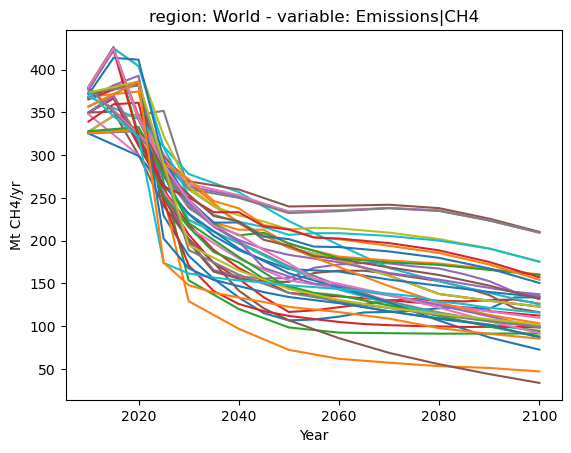

In [28]:
df.filter(variable='Emissions|CH4', region='World').plot()

In [30]:
df.meta.head(10)

exclude
model         scenario                                  
AIM/CGE 2.0   ADVANCE_2020_1.5C-2100               False
              SSP1-19                              False
              SSP2-19                              False
AIM/CGE 2.1   CD-LINKS_NPi2020_400                 False
              TERL_15D_LowCarbonTransportPolicy    False
              TERL_15D_NoTransportPolicy           False
C-ROADS-5.005 Ratchet-1.5-limCDR-noOS              False
              Ratchet-1.5-noCDR                    False
              Ratchet-1.5-noCDR-noOS               False
GCAM 4.2      SSP1-19                              False

In [32]:
df_world = df.filter(region='World')

In [33]:
df_world.require_variable(variable='Emissions|CO4', year=2100)

pyam.core - INFO: 42 scenarios do not include required variable `Emissions|CO4`


,model,scenario
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100
1,AIM/CGE 2.0,SSP1-19
2,AIM/CGE 2.0,SSP2-19
3,AIM/CGE 2.1,CD-LINKS_NPi2020_400
4,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy
5,AIM/CGE 2.1,TERL_15D_NoTransportPolicy
6,C-ROADS-5.005,Ratchet-1.5-limCDR-noOS
7,C-ROADS-5.005,Ratchet-1.5-noCDR
8,C-ROADS-5.005,Ratchet-1.5-noCDR-noOS
9,GCAM 4.2,SSP1-19


pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Emissions|CH4'}, xlabel='Year', ylabel='Mt CH4/yr'>

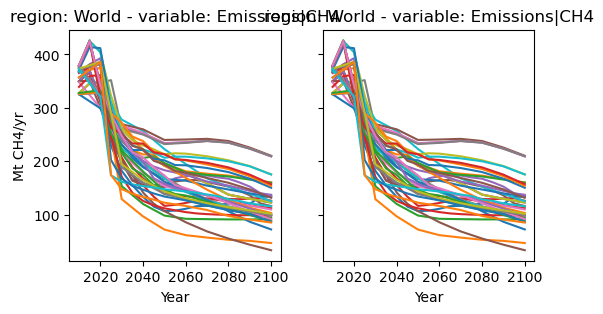

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

df_world_ch4 = df_world.filter(variable='Emissions|CH4')

df_world_ch4.plot(ax=ax[0])
df_world_ch4.filter(exclude=False).plot(ax=ax[1])

# Highest point Emissions CH4

pyam.plotting - INFO: >=13 labels, not applying legend


Text(2005, 90, 'Highest point')

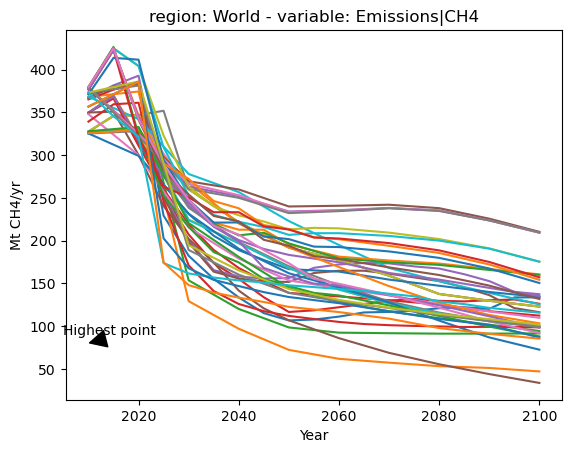

In [52]:
ax = df.filter(variable='Emissions|CH4', region='World').plot()
ax.annotate('Highest point', xy=(2010, 80), xytext=(2005, 90),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Purple World CH4 Emissions

pyam.plotting - INFO: >=13 labels, not applying legend


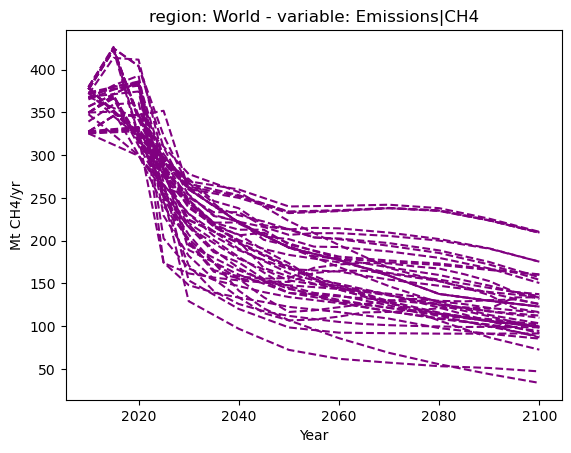

In [53]:
ax = df.filter(variable='Emissions|CH4', region='World').plot(color='purple', linestyle='--')

# Zoom In: CH4 World Emissions

pyam.plotting - INFO: >=13 labels, not applying legend


(0.0, 100.0)

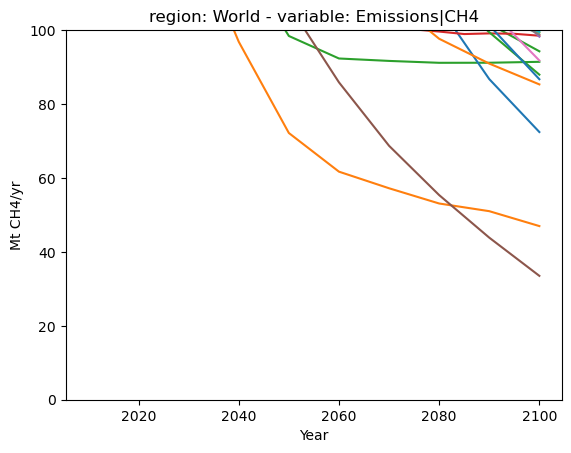

In [55]:
ax = df.filter(variable='Emissions|CH4', region='World').plot()
ax.set_ylim([0, 100])